<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/%5B04%5D_gd_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Partie A : descente de gradient pour fonction univariable

Soit la fonction $f:\mathbb{R}↦\mathbb{R}$ telle que $f(x) =(x+1)^2$.

In [1]:
def f(x):
  return (x + 1) ** 2

On veut trouver $x^*\in\mathbb{R}$ tel que $x^* = \arg\min_{x\in\mathbb{R}}f(x)$ par l'algorithme de descente de gradient.

### Exercices


#### 1.
Compléter la fonction Python ci-dessous, qui pour $x\in\mathbb{R}$ retourne $f'(x)$, la dérivée de $f$ en $x$.

In [2]:
def derivee_f(x):
  return 2*(x+1)

#### 2.
Programmer la descente de gradient en utilisant la fonction `derivee_f` et en vous aidant du bout de code ci-dessous. S'assurer que $x$ converge bien vers $x^*$.

In [9]:
alpha = 0.1
x = 1
# descente de gradient
for k in range(100):
  x = x - alpha*(derivee_f(x))

print(x)

-0.9999999995925928


## Partie B : calcul automatique de dérivées avec PyTorch

On va refaire maintenant cette même descente de gradient en utilisant la librairie `PyTorch`. L'utilité principale de `PyTorch` est d'automatiser le calcul des dérivées de fonctions réelles. Voici ci-dessous un exemple d'utilisation, qui calcule $f'(1)$ pour la fonction $f$ définie plus haut.

In [35]:
import torch  # on import la librairie pytorch


# on crée une variable x initialisée à 1 et on indique à pytorch qu'on va
# calculer des dérivées par rapport à cette variable en passant requires_grad=True
x = torch.tensor(1., requires_grad=True)

# on calcule f(x) sans modification de la fonction f définie en Partie A
y = f(x)

# on met à zéro le champ dérivée (.grad) de la variable x. Il est impératif
# de faire cela avant de demander à pytorch de calculer la dériviée
# car la valeur de la dérivée est ajoutée au champ .grad
x.grad = None

# on demande à pytorch de calculer la dérivée de y. Il calculera ainsi la
# dérivée de y par rapport à toute variable qui intervient dans le calcul de y
# et pour qui 'requires_grad' est à 'True'
y.backward(retain_graph=True)

# on retrouve de façon automatique cette dérivée dans x.grad
print(x.grad)

tensor(4.)


### Exercices

#### 1.

Calculer en utilisant `PyTorch` $f'(2)$ puis comparer avec la valeur retournée par la fonction `derivee_f` de la Partie A.

In [56]:
print(derivee_f(2))
x.data = torch.tensor(2.)
y = f(x)
x.grad = None
y.backward()
print(x.grad)

6
tensor(6.)


#### 2.
Écrire en `Python` la fonction $g(x) = x^3$, puis utiliser `PyTorch` pour calculer $g'(3)$. Est-ce que cela correspond au résultat attendu?

In [54]:
x = torch.tensor(3., requires_grad=True)
y = x**3
x.grad = None
y.backward()
print(x.grad)

tensor(27.)


#### 3.
Coder la descente de gradient en utilisant `PyTorch` pour le calcul de la dérivée. Vérifier que $x$ converge bien vers $x^*$.

In [71]:
import torch
alpha = 0.1

# descente de gradient avec pytorch
x = torch.tensor(1., requires_grad=True) # créer la variable x
for k in range(100):
  # Mettre le gradient de x à zero
  x.grad = None
  # Calculer f(x) et sa dérivée
  y = f(x)
  y.backward()
  x.data = x - alpha*x.grad # MAJ suivant la descente de gradient

print(x)
print(x.grad)

tensor(-1.0000, requires_grad=True)
tensor(2.3842e-07)


## Partie C : régression linéaire avec Pytorch

### Exercices

#### 1.
Coder la régression linéaire par descente de gradient avec Pytorch sur les données `Diabetes` de [scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [72]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

data_x = torch.tensor(data.data, dtype=torch.float)

In [130]:

w = torch.randn(10).requires_grad_(True)
b = torch.randn(1)[0].requires_grad_(True)
alpha = 0.1



def model(w,k,b):
  return torch.dot(w, data_x[k]) + b

def EQM(w,b):
  Lteta = 0
  for k in range(len(data_x)):
    Lteta += (model(w,k,b) - data.target[k])**2
  Lteta = Lteta / (len(data_x))
  return Lteta

print(EQM(w,b))

for k in range(1000):
  w.grad = None
  b.grad = None
  y = EQM(w,b)
  y.backward()
  w.data -= alpha*w.grad
  b.data -= alpha*b.grad

print(EQM(w,b))

tensor(29108.2773, grad_fn=<DivBackward0>)
tensor(3407.1770, grad_fn=<DivBackward0>)


#### 2.
Pour les poids du modèle appris, calculer le score $R^2 = 1 - \frac{\sum_k (f(x_k) - y_k)^2}{\sum_k(\bar{y} - y_k)^2}$.

In [131]:
rCarré = 1
for k in range(len(data_x)):
  numerateur += (model(w,k,b) - data.target[k])**2
  denominateur += ((data.target.mean()) - data.target[k])**2
rCarré -= numerateur/denominateur

print(rCarré)


tensor(0.4397, grad_fn=<RsubBackward1>)


#### 3.
Inspecter le vecteur de poids du modèle linéaire et proposer une interprétation de la relation entre données en entrée et données de supervision

## Partie D : classification binaire avec PyTorch

On commence par charger les données `iris`.

In [132]:
from sklearn import datasets
import torch
import matplotlib.pyplot as plt

# Données
donnees = datasets.load_iris()
filtre = donnees['target'] != 2  # Initialement le jeu de données contient une troisième classe, Iris-Virginica, qu'on ignore
attributs = torch.tensor(donnees['data'][filtre, :2]).float()  # Initialement le jeu de données contient deux autres attributs, longueur et largeur de la pétale, qu'on ignore
classes = torch.tensor(donnees['target'][filtre])
classes[classes == 0] = -1  # On remplace la classe 0 par -1
pos_class = classes == 1

# Poids neurone formel
w = torch.randn(2).requires_grad_(True)
b = torch.randn(1)[0].requires_grad_(True)

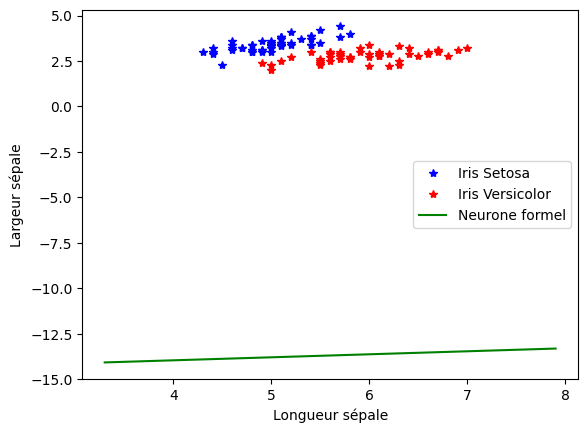

In [133]:
# Affichage
plt.plot(attributs[~pos_class, 0], attributs[~pos_class, 1], '*b')
plt.plot(attributs[pos_class, 0], attributs[pos_class, 1], '*r')
o = torch.arange(attributs[:, 0].min() - 1, attributs[:, 0].max() + 1, .1)
a = -(w[0] * o + b) / w[1]
plt.plot(o, a.detach(), '-g')
plt.legend(['Iris Setosa', 'Iris Versicolor', 'Neurone formel'])
plt.xlabel('Longueur sépale')
plt.ylabel('Largeur sépale')
plt.show()

### Exercices

#### 1.
Soit la fonction ci-dessous qui calcule $w\cdot x + b$

In [153]:
def fonction_lineaire(w, b, x):
  return torch.dot(w, x) + b

En utilisant la fonction `fonction_lineaire`, calculer la fonction de coût $\ell(w, b, x, y)$ qui est égale à 0 si le neurone formel prédit la classe $y$ pour la donnée $x$, et $-y (w\cdot x + b)$ sinon

In [157]:
def fonction_cout_l(w, b, x, y):
  return max(0,-y* fonction_lineaire(w,b,x))

#### 2.
En utilisant la fonction `fonction_cout_l`, compléter la fonction `somme_fonction_cout(w, b, X, Y)` ci-dessous qui calcule la somme $\sum_{(x_i, y_i)\in(X, Y)} \ell(w, b, x_i, y_i)$ pour toutes les données $(x_i, y_i)$ de $(X, Y)$

In [162]:
def somme_fonction_cout(w, b, X, Y):
  sum = 0
  for i in range(len(X)):
      sum += fonction_cout_l(w,b,X[i],Y[i])
  return sum

Vérifier que la fonction de coût retourne une valeur $> 0$ avant apprentissage de $w$ et $b$ pour la classification des données `Iris`

In [168]:
somme_fonction_cout(w, b, attributs, classes)

0

#### 3.
Compléter le code ci-dessous qui apprend les poids $w$ et $b$ du neurone formel pour la classification binaire des données `Iris`. Augmenter le nombre d'itérations jusqu'à ce que la fonction de coût soit nulle (i.e. toutes les données sont bien classées)

In [166]:
alpha = 1.
for t in range(1000):
  w.grad = None
  b.grad = None
  y = somme_fonction_cout(w, b, attributs, classes)
  y.backward()
  w.data -= alpha*w.grad
  b.data -= alpha*b.grad

somme_fonction_cout(w, b, attributs, classes)

AttributeError: 'int' object has no attribute 'backward'